In [9]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/france-gdp-growth-rate.csv')
df

,date,GDP(B),GDP_Growth,Annual_Change,Unemployment_Rate,Annual_Change.1,Agriculture,Industry,Services,Inflation,CPI,Pdebt
0,2011/12/31,2865.157542,2.1927,0.24,8.810,-0.06,2010.767563,512.576684,47.275099,2.1116,96.71,87.8
1,2012/12/31,2683.671717,0.3131,-1.88,9.400,0.59,2013.632721,479.572136,43.743849,1.9542,98.61,90.6
2,2013/12/31,2811.876903,0.5763,0.26,9.920,0.52,1976.749463,505.294280,41.053403,0.8637,99.46,93.4
3,2014/12/31,2855.964489,0.9562,0.38,10.290,0.37,2009.171018,506.933697,44.553046,0.5078,99.96,94.9
4,2015/12/31,2439.188643,1.1129,0.16,10.350,0.06,1715.237454,431.248552,39.270937,0.0375,100.00,95.6
5,2016/12/31,2472.964345,1.0955,-0.02,10.050,-0.30,1743.687159,431.037685,35.610687,0.1833,100.18,98.0
6,2017/12/31,2595.151045,2.2914,1.20,9.410,-0.64,1824.131670,447.404040,39.965326,1.0323,101.22,98.1
7,2018/12/31,2790.956879,1.8651,-0.43,9.020,-0.39,1956.460772,479.765488,46.050789,1.8508,103.09,97.8
8,2019/12/31,2728.870247,1.8430,-0.02,8.410,-0.61,1911.300721,475.369197,41.478828,1.1083,104.23,97.4
9,2020/12/31,2630.317731,-7.8553,-9.70,8.010,-0.40,1871.734098,458.990444,42.085084,0.4765,104.73,115.0


In [12]:
df['date'] = pd.to_datetime(df['date'])
df.drop(df.index[11],inplace=True)
df.Inflation = df['Inflation'].astype('float')


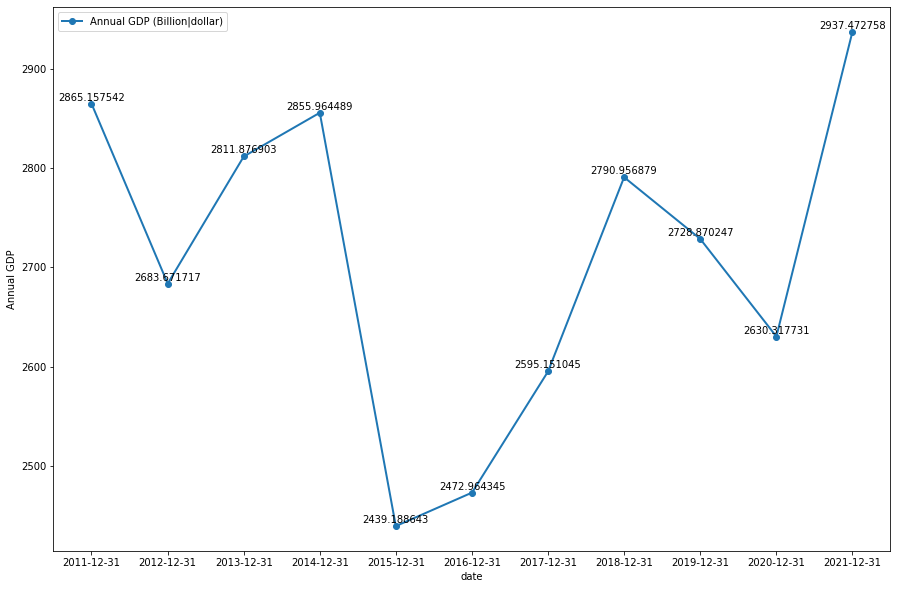

In [13]:
plt.figure(figsize=(15,10))
plt.plot(df.date,df['GDP(B)'],linewidth=2,label='Annual GDP (Billion|dollar)',marker='o')
for a,b in zip(df.date,df['GDP(B)']):
    plt.text(a,b+1,b,ha='center',va='bottom')
    
    
plt.legend(loc='upper left')
plt.xlabel('date')
plt.ylabel('Annual GDP')
plt.xticks(df.date)
plt.show()


Text(0.5, 0, 'Date')

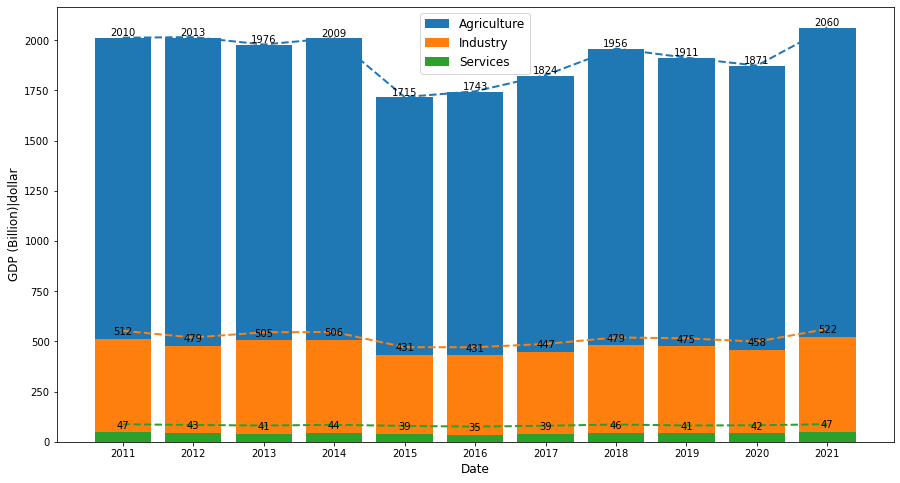

In [15]:
plt.figure(figsize=(15,8))

xticks = ["20{}".format(i) for i in range(11,22)]
plt.bar(xticks,df.Agriculture,label='Agriculture')#,alpha=0.5,color='g')
plt.bar(xticks,df.Industry,label='Industry')#,alpha=0.5,color='grey')
plt.bar(xticks,df.Services,label='Services')#,alpha=0.5,color='deepskyblue')
plt.plot(xticks,df.Agriculture+2,linestyle="--",linewidth=2)
 
plt.plot(xticks, df.Industry+40, linestyle="--",linewidth=2)

plt.plot(xticks, df.Services+40, linestyle="--",linewidth=2)
for i,j in zip(xticks,df.Agriculture):
 
   plt.text(i,j+1,"%d"%j,ha="center",va="bottom")

for i2,j2 in zip(xticks,df.Industry):
 
   plt.text(i2,j2+10,"%d"%j2,ha="center",va="bottom")

for i3,j3 in zip(xticks,df.Services):
 
   plt.text(i3,j3+10,"%d"%j3,ha="center",va="bottom")
    
plt.legend(fontsize='large')
plt.ylabel('GDP (Billion)|dollar',fontsize=12)
plt.xlabel('Date',fontsize=12)

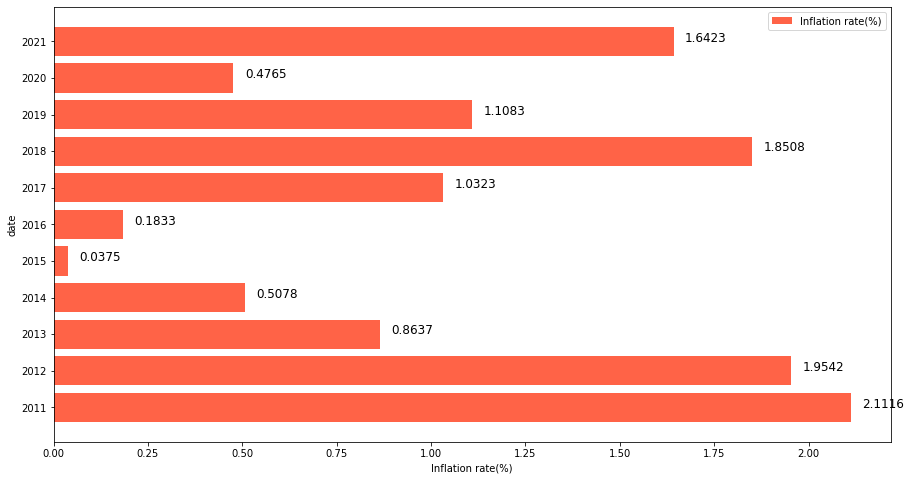

In [16]:
plt.figure(figsize=(15,8))
xticks = ["20{}".format(i) for i in range(11,22)]

plt.barh(xticks,df['Inflation'],label='Inflation rate(%)',color='tomato')
for a,b in zip(xticks,df.Inflation):
 
    plt.text(b+0.03, a, str(b), fontsize=12)
plt.legend()
plt.xlabel('Inflation rate(%)')
plt.ylabel('date')
plt.show()

In [17]:
#observation
#There are some missing obeservation so I decide to drop the last row and convert the column of date from object to date formate.
#The conclusion I make from the first graph is that the France GDP increases generally from 2013 to 2021. 
#From the second graph, the largest composition of France's GDP is agriculture and services only play a tiny role in France's GDP.
#From the last graph, the inflation rate slightly decreases in 2021 which is a good indicator. 
